In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
df=pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

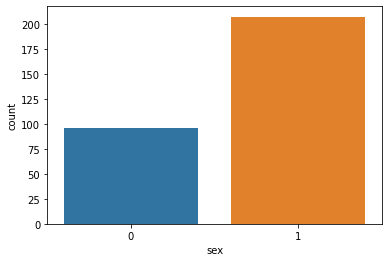

In [5]:
sns.countplot('sex',data=df)

In [6]:
X=df.drop('target',axis='columns').values
y=df['target'].values

In [7]:
df['target'].unique()

array([1, 0], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=41)
X_train.shape,X_test.shape

((212, 13), (91, 13))

In [9]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
print(f'training accuracy : {model.score(X_train,y_train)}')
print(f'testing accuracy : {model.score(X_test,y_test)}')

training accuracy : 0.8537735849056604
testing accuracy : 0.8241758241758241


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[38,  9],
       [ 7, 37]], dtype=int64)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        47
           1       0.80      0.84      0.82        44

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



#### Standard scaling from scratch

In [13]:
scaler = StandardScaler()
num=[68,21,1,33,66,44,88,20,44,12]
mean=np.mean(num)
std=np.std(num)
scaled=[]
for i in num:
    print((i-mean)/std) # z = (x - u) / s
    scaled.append((i-mean)/std)
    
print()
print(f'mean: {mean}')
print(f'std: {std}')

1.0765749475758453
-0.7113763787868661
-1.4722067304305733
-0.25487816780064193
1.0004919124114746
0.1635785256033969
1.8374052992195522
-0.7494178963690515
0.1635785256033969
-1.0537500370265342

mean: 39.7
std: 26.287069064465896


#### Using sklearn library

In [14]:
nums=np.array(num).reshape(-1,1)
nums

array([[68],
       [21],
       [ 1],
       [33],
       [66],
       [44],
       [88],
       [20],
       [44],
       [12]])

In [15]:
scaler = StandardScaler()
scaler.fit(nums)
scaler.transform(nums)

array([[ 1.07657495],
       [-0.71137638],
       [-1.47220673],
       [-0.25487817],
       [ 1.00049191],
       [ 0.16357853],
       [ 1.8374053 ],
       [-0.7494179 ],
       [ 0.16357853],
       [-1.05375004]])

In [16]:
X=scaler.fit_transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=41)

((212, 13), (91, 13))

In [18]:
model.score(X_train,y_train)

0.8349056603773585

In [19]:
model.score(X_test,y_test)

0.8461538461538461

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(f'training accuracy : {model.score(X_train,y_train)}')
print(f'testing accuracy : {model.score(X_test,y_test)}')

training accuracy : 0.8584905660377359
testing accuracy : 0.8351648351648352


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        47
           1       0.81      0.86      0.84        44

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



#### using Sklearn cross_val_score

In [24]:
cross_val_score(LogisticRegression(),X,y).mean()

0.8348633879781422

In [25]:
cross_val_score(RandomForestClassifier(),X,y).mean()

0.8248087431693989

In [26]:
cross_val_score(SVC(),X,y).mean()

0.8182513661202184